<a href="https://colab.research.google.com/github/YIYIOX/Pruebas/blob/main/Metricas_IBERO_IA_2025C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelos de Entrenamiento

## <span style="color:green">Regresión Lineal</span>

**Modelo de Regresión Lineal**

$ y = h_b(x) = b \cdot x $

**Ecuación del Promedio de la suma de los errores al cuadro**

$ MSE(b) = \frac{1}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)^2$

**Ecuación Normal**

$ \hat{b} = (x^Tx)^{-1} x^T y $

#### <span style="color:blue"> Ecuación Normal </span>

In [ ]:
# Importar las librerías, numpy, matplotlib, pandas
# numpy es la bibleoteca por exelencia de matemáticas para python
import numpy as np
#Importar matplotlib porque vamos a estar haciendo gráficas
import matplotlib.pyplot as plt
import pandas as pd

# Compración entre numpy y listas

In [ ]:
#Costo computacional
#Obtener el seno de una arreglo usando listas.
import math
import time
x=[]
inicio=time.time()
for i in range(100000000):
    x.append(math.sin(i))
fin=time.time()
print('El tiempo de ejecución fue: ', fin-inicio)
#print(x)
#print(type(x))

El tiempo de ejecución fue:  21.59329652786255


In [ ]:
xn=np.arange(100000000)
inicio_n=time.time()
np.sin(xn)
fin_n=time.time()
tiempo_n=fin_n-inicio_n
print('El tiempo de ejecución fue: ', tiempo_n)


El tiempo de ejecución fue:  2.201124906539917


In [ ]:
#Generar el set de datos lineales aleatorios
x = np.random.rand(100,1)

#Genera vector de valores que vas a estar prediciendo
y = 3 + 3 * x + np.random.rand(100,1)
print(x)
print('-----------------------')
print(y)

[[0.34935005]
 [0.43798341]
 [0.93894315]
 [0.61921067]
 [0.56918199]
 [0.49474229]
 [0.45499459]
 [0.32642022]
 [0.33748078]
 [0.35948048]
 [0.19588086]
 [0.71279404]
 [0.5632553 ]
 [0.30915174]
 [0.13946611]
 [0.7792447 ]
 [0.47526288]
 [0.97637801]
 [0.50103789]
 [0.47650372]
 [0.72358866]
 [0.80335333]
 [0.23163931]
 [0.63186856]
 [0.2326467 ]
 [0.29139989]
 [0.1815743 ]
 [0.77080506]
 [0.99698017]
 [0.30167051]
 [0.62953106]
 [0.13317912]
 [0.1072299 ]
 [0.90812604]
 [0.46298113]
 [0.74917499]
 [0.63442357]
 [0.92219747]
 [0.6262341 ]
 [0.30785688]
 [0.80413242]
 [0.34116871]
 [0.29066712]
 [0.37102429]
 [0.62447568]
 [0.13398265]
 [0.31384899]
 [0.76955966]
 [0.37696298]
 [0.79969466]
 [0.22660072]
 [0.33781556]
 [0.64823008]
 [0.56184016]
 [0.12199582]
 [0.77615076]
 [0.39891423]
 [0.50474086]
 [0.64829674]
 [0.38218833]
 [0.93508469]
 [0.92026319]
 [0.22573982]
 [0.05074923]
 [0.80337065]
 [0.37814285]
 [0.15146461]
 [0.98362146]
 [0.43563175]
 [0.50140853]
 [0.53863852]
 [0.99

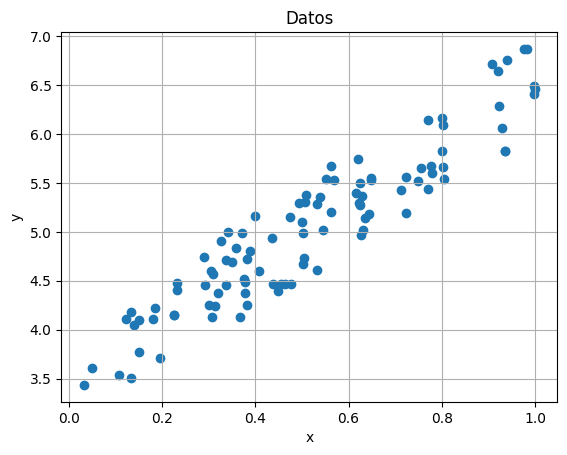

In [ ]:
#Gráfica los datos del set de juguete
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos')
plt.grid()
plt.show()

In [ ]:
#Agregar el valor de x0
x_b = np.c_[np.ones((100,1)),x]
#Aplicar la ecuación normal
param = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
#Visualiza
param

array([[3.50335372],
       [2.97650919]])

Aquí no tendrán los mismos datos que yo, es normal por los factores de aleatoriedad

El primer valor de la matriz es la pendiente y el segundo es la intersección

In [ ]:
#Prueba estes datos con un vector de prueba
x_nuevo = np.array([[0],[1]])

In [ ]:
#Agregar X0=1
x_nuevo_b = np.c_[np.ones((2,1)),x_nuevo]

In [ ]:
#Hacer las predicciones con la ecuación normal
y_pred = x_nuevo_b.dot(param)
y_pred

array([[3.50335372],
       [6.47986291]])

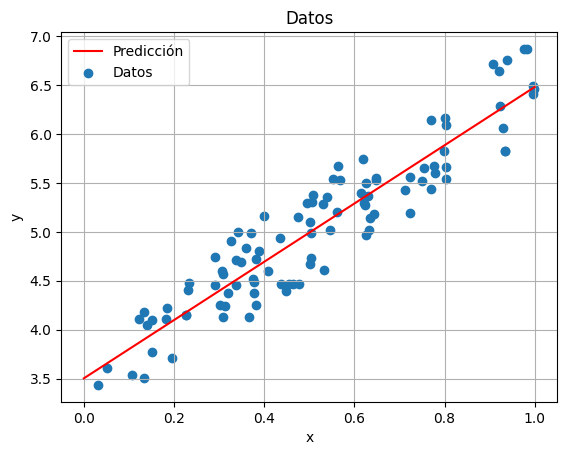

In [ ]:
#Grafica la regresión con los datos originales y la predicción
plt.plot(x_nuevo,y_pred,"r-",label="Predicción")
plt.scatter(x,y,label="Datos")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos')
plt.grid()
plt.legend()
plt.show()

#### <span style="color:blue"> Regresor Linear de Scikit </span>

In [ ]:
#Haz la regresión con scikit
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(x,y)
#Cálcula la intersección y la pendiente con este método
reg_lin.intercept_,reg_lin.coef_

(array([3.50335372]), array([[2.97650919]]))

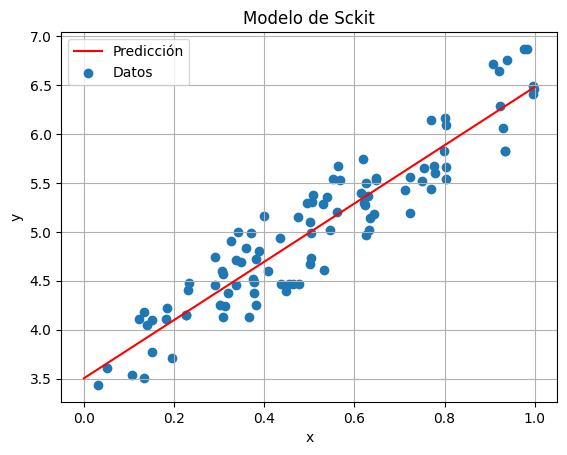

In [ ]:
#Graficar
#Y=mx+b
linea=reg_lin.coef_*x_nuevo+reg_lin.intercept_
plt.plot(x_nuevo,linea,"r-",label="Predicción")
plt.scatter(x,y,label="Datos")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Modelo de Sckit')
plt.grid()
plt.legend()
plt.show()


Los parámetros son iguales a los que obtuvimos en el método anterior. En este caso, tendrías que evaluar el costo 💸 que implica cada método a tu computadora.

#Ejemplo desde Sckit


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


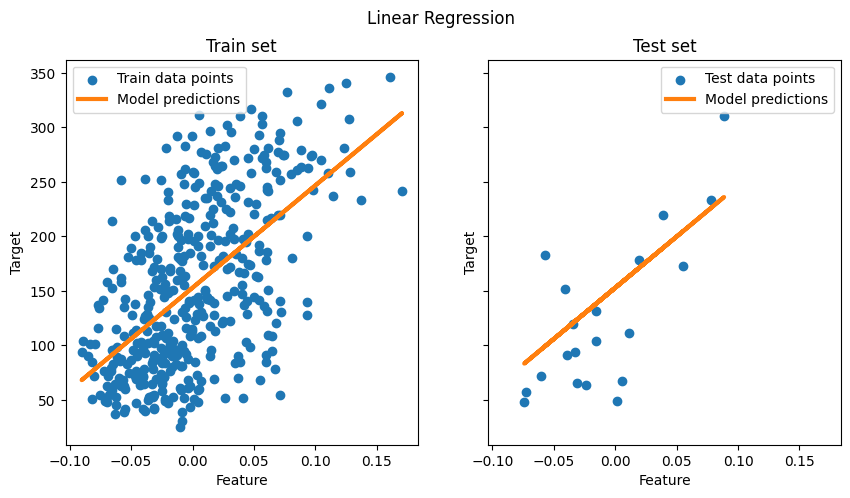

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

***

## <span style="color:green">Descenso del Gradiente</span>

Algoritmo de optimización. Signfica una alternativa a la ecuación normal

#### <span style="color:blue">Descenso del Gradiente por Lote</span>

**Derivada parcial de la función de costo (MSE)**

$ \frac{\partial}{\partial b} J(b) = \frac{2}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)x^i$

**Vector del Gradiente de la función de costo**

$ \bigtriangledown_b MSE(b) = [\frac{\partial}{\partial b_1} MSE(b_1), \frac{\partial}{\partial b_2} MSE(b_2) ,....\frac{\partial}{\partial b_m} MSE(b_m)] = \frac{2}{m} X^T(Xb-y) $

**Step del descenso del Gradiente**

$ b^{+} = b-n\bigtriangledown_b MSE(b) $

In [ ]:
# Definir la tasa de aprendizaje (ra)
ra = 0.1
#Definir las iteraciones. 1000 es un estándar. En 1000 se va a detener
iteraciones = 1000
#Número de datos
m = 100

#Incializa la pendiente
b = np.random.rand(2,1)

In [ ]:
#Hacer el programa para el descenso del gradiente
for iteracion in range(iteraciones):
    #Expresión a manera de ágebra lineal de los mínimos cuadrados (función de costo)
    gradientes  = 2/m * x_b.T.dot(x_b.dot(b) - y)
    b = b -ra * gradientes
b

array([[3.4626248 ],
       [3.13840098]])

Los resultados nos da extremadamente cercano a los datos obtenidos con la ecuación normal. Ojo: recuerda que el descenso del gradiente es un método de aproximación

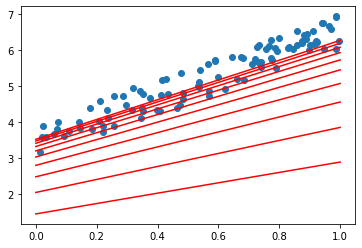

array([[-0.4669283 ],
       [-0.33665973]])

In [ ]:
#Repetir el ejercicio pero con ritmo de tasa de aprendizaje diferente
ra = 0.1
iteraciones = 10
m = 100

b = np.random.rand(2,1)

plt.scatter(x,y,label="Datos")

#Visualiza los modelos que va proponiendo hasta llegar a la predicción final
for iteracion in range(iteraciones):
    gradientes  = 2/m * x_b.T.dot(x_b.dot(b) - y)
    b = b -ra * gradientes
    y_nuevo = x_nuevo_b.dot(b)
    plt.plot(x_nuevo,y_nuevo,"r-")
plt.show()
gradientes

**Ejercicio**: Varía la tasa de aprendizaje y los número de pasos para observar como funciona el gradiente de tipo batch

***

#### <span style="color:blue">Descenso del Gradiente Estocástico</span>

Debido a qué la complejidad computacional del descenso del gradiente de lote es alto, podemos ver el descenso del gradiente estocástico para poder mejorar las predicción.

**Ventajas**: Puedes trabajar con más datos, escapa de los mínimos locales.
**Desventajas:** No es tan exacto como los otros métodos. Sin embargo, su variación es despreciable

In [ ]:
# epochs: cuántas gradientes hará, cuántos datos seleccionará para hacer el gradiente
epochs = 50
#Calendario de aprendizaje, sirve para definir el ritmo de aprendizaje
t0 , t1 = 5, 50
m = 100
#Definir el horario de aprendizaje
def horario_aprendizaje(t):
    return t0 / (t + t1)
#Definir los 2 valores con lo que van a empezar
b = np.random.rand(2,1)

#Definir la función
for epoch in range(epochs):
    for i in range(m):
        #Genera un índice aleatorio
        random_index = np.random.randint(m)
        #Valor x de la coordenada que seleccionamos al azar
        xi = x_b[random_index:random_index+1]
        #Valor y de la coordenada que seleccionamos al azar
        yi = y[random_index:random_index+1]
        #Calcular el gradiente (Resultado de la derivada parcial)
        gradientes  = 2 * xi.T.dot(xi.dot(b) - yi)
        #Calcular el ritmo de aprendizaje
        ra = horario_aprendizaje(epoch * m + i)
        #Calcular los parámetros de intersección y pendiente
        b = b -ra * gradientes
b

array([[3.46713171],
       [3.10678409]])

Aunque existe variación con el resultado de los métodos anteriores, la diferencia es mínima

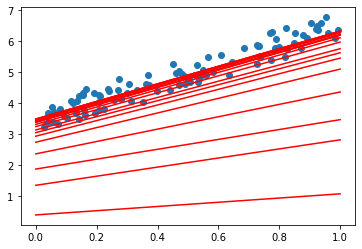

In [ ]:
# #Repetir el ejercicio pero desplegando cada gradiente realizado
epochs = 4
t0 , t1 = 5, 50
m = 5

def horario_aprendizaje(t):
    return t0 / (t + t1)

b = np.random.rand(2,1)
#Agrega un scatterplot para ver los datos
plt.scatter(x,y,label="Datos")

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        y_nuevo = x_nuevo_b.dot(b)
        #Grafica las líneas rojas que simbolizan los diferentes gradientes a través de las iteraciones.
        plt.plot(x_nuevo,y_nuevo,"r-")
        gradientes  = 2 * xi.T.dot(xi.dot(b) - yi)
        ra = horario_aprendizaje(epoch * m + i)
        b = b -ra * gradientes
plt.show()

In [ ]:
#Hacerlo con scikit
from sklearn.linear_model import SGDRegressor
#La toleración es el límite menor al valor de la suma de los errores al cuadrado
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
#.ravel: te genera una lista normal
sgd.fit(x, y.ravel())
#Sacar los parámetros, la intersección y la pendiente
sgd.intercept_, sgd.coef_

(array([3.4900843]), array([2.91758961]))

In [ ]:
#Visualiza la lista normal que genera .ravel
y.ravel()

array([4.38213529, 5.73734445, 6.28324345, 4.84047429, 4.39617872,
       4.90869244, 3.58689118, 6.20769317, 5.73183408, 5.77779909,
       4.62331238, 3.40233755, 3.38419462, 4.32481833, 4.76968239,
       4.42806997, 4.11252204, 5.49573432, 4.34838138, 6.39555338,
       5.50994925, 4.44664888, 4.34061617, 5.93857937, 4.054832  ,
       6.27550781, 4.68638927, 6.5766789 , 5.26095901, 5.78432088,
       3.82015444, 6.5020056 , 4.27754015, 6.37060961, 4.63431983,
       4.26682861, 4.93425132, 4.59185976, 3.47987517, 3.7237929 ,
       4.90705008, 5.53151155, 5.28366936, 4.6123634 , 5.07650598,
       4.90134482, 4.90391259, 4.25013423, 4.73983454, 6.4401044 ,
       5.05429251, 4.0143636 , 5.49909963, 4.4678821 , 3.69360099,
       3.69756427, 3.81486117, 4.05866637, 3.24950017, 6.27785859,
       5.83597681, 4.44001332, 4.91244696, 3.77108279, 4.43484189,
       6.12136709, 6.31402317, 4.23740807, 5.81721028, 3.52503753,
       4.05021863, 5.00390564, 6.09846776, 4.92481197, 6.37903

👀: Con este método si existió una variación importante en los resultados obtenidos. Es cuestión de criterio el sacrificar exactitud por costo computacional o viceversa.

***

## <span style="color:green">Regresión polinomial</span>

Regresión polinomial es una regresión linel a la cual le agregamos ecuaciones con potencia más elevada

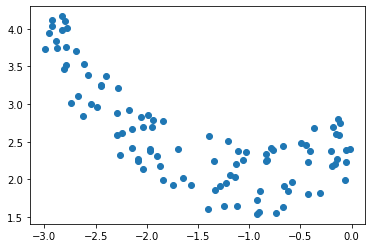

In [ ]:
#Generar set de datos de juguete. Añade un toque de aleatoriedad 🧙🏻‍♀️
m = 100
x = 3 * np.random.rand(m,1) - 3
#Elevar la ecuación al 2
y = 2 + x + 0.5*x**2 + np.random.rand(m,1)
#Gráfica el set de datos
plt.scatter(x,y)

No hay una función en scikit para hacer regresiones polinomiales como tal. Pero podemos utilizar PolynomialFeature que toma los valores de x y los eleva a una potencia especificada.

In [ ]:
#Importar PolynomialFeatures con una potencia 2
from sklearn.preprocessing import PolynomialFeatures
poli = PolynomialFeatures(degree=2, include_bias=False)
x_poli = poli.fit_transform(x)
x[0], x_poli[0]

(array([-2.83247844]), array([-2.83247844,  8.0229341 ]))

In [ ]:
#Hacer una regresión lineal sobre de los datos
reg_lin = LinearRegression()
reg_lin.fit(x_poli,y)
reg_lin.intercept_,reg_lin.coef_

(array([2.56200335]), array([[1.1118853 , 0.53940892]]))

Primero aparece el dato de la intersección y luego aparece los coeficientes de de x y x2, respectivamente

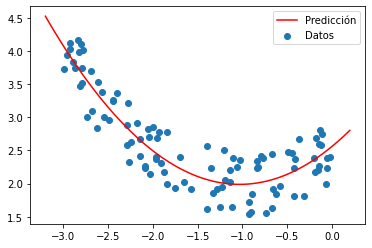

In [ ]:
#Graficar la predicción de PolynomialFeatures y los datos originales
x_nuevo = np.linspace(-3.2,0.2,100)
#escribir la fórmula a partir del array de arriba
y_nuevo = 2.56 + 1.11 * x_nuevo + 0.539 * x_nuevo ** 2
plt.plot(x_nuevo,y_nuevo,"r-",label="Predicción")
plt.scatter(x,y,label="Datos")
plt.legend()
plt.show()

**Ejercicio**: calcular la suma de los errores al cuadrado  y compararlo con una predicción lineal

***

## <span style="color:green">Curvas de Aprendizaje</span>

In [ ]:
#Importar mean_squared_error train_test_split para medir el error sobre los datos de entranamiento y validación
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def curvas_aprendizaje(modelo ,x , y):
    #Empezamos dividiendo los datos en datos de entrenamiento y validación
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    #Generar una lista vacías para irlas rellenando conforme se vaya calculando los errores
    train_error, val_errors= [], []
    #Tomar el set de entrenamiento y ajustándolo al modelo pero solo con un dato de entrenamiento y así sucesivamente
    for m in range(1,len(x_train)):
        modelo.fit(x_train[:m], y_train[:m])
        #predecir el modelo
        y_train_pred = modelo.predict(x_train[:m])
        #predecir el modelo
        y_val_predict = modelo.predict(x_val)
        #Calcular los errores
        train_error.append(mean_squared_error(y_train[:m],y_train_pred))
        val_errors.append(mean_squared_error(y_val,y_val_predict))

        #graficarlos
    plt.plot(np.sqrt(train_error), "r-+", label = "set de entranamiento")
    plt.plot(np.sqrt(val_errors), "b-", label = "set de validación")
    plt.axis([0,80,0,2])
    plt.legend()

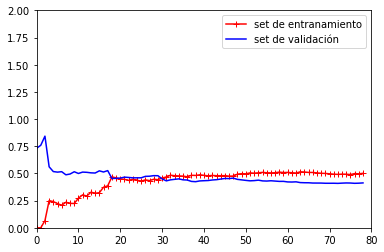

In [ ]:
#Correr la curva de aprendizaje
reg_lin = LinearRegression()
curvas_aprendizaje(reg_lin, x, y)

In [ ]:
#Hacer un pipeline llamado regresion_polinomial que haga una regresión polinomial y lineal
from sklearn.pipeline import Pipeline

regresion_polinomial = Pipeline([
    ("carac_polinomiales", PolynomialFeatures(degree=10, include_bias=False)),
    ("reg_lin", LinearRegression())
])

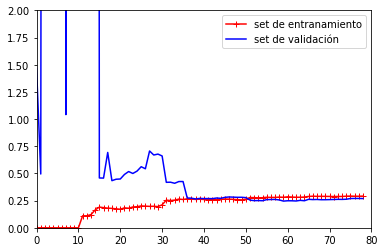

In [ ]:
#Ejecutar curvas de aprendizaje a regresion_polinomial
curvas_aprendizaje(regresion_polinomial,x,y)

In [ ]:
#Variar el grado del polinomio para mejorar el rendimiento del modelo. Ejemplo:2
from sklearn.pipeline import Pipeline

regresion_polinomial = Pipeline([
    ("carac_polinomiales", PolynomialFeatures(degree=2, include_bias=False)),
    ("reg_lin", LinearRegression())
])

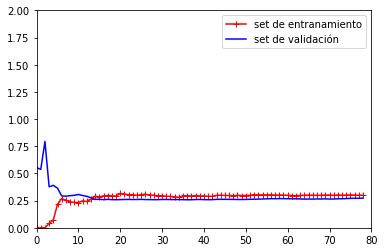

In [ ]:
curvas_aprendizaje(regresion_polinomial,x,y)

Generalemnte, cuando las línas se tocan signfica que llegaste a un buen modelo. No esta sobreajustado ni subajustado

***

## <span style="color:green"> Regularización de Modelos lineales</span>

### <span style="color:blue">5.1 Regresión de Ridge o de Cresta</span>

**Término de regularización en la regresión de Ridge**

$ \alpha \sum_{i=1}^{m} b_i^2 $

**Función de costo de la regresión de Ridge**

$ MSE(b) + \alpha \frac{1}{2} \sum_{i=1}^{m} b^2 $

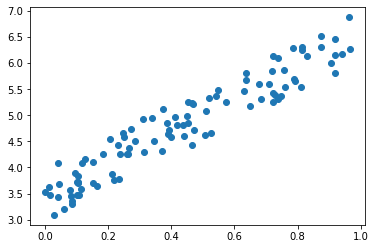

In [ ]:
#Hacer un set de juguete
x = np.random.rand(100,1)
y = 3 + 3 * x + np.random.rand(100,1)
plt.scatter(x,y,label="Datos")

In [ ]:
#Hacer una regresión lineal sencilla para comparar con la regresión de cresta
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.46027386]), array([[3.09282979]]))

In [ ]:
#Generar 100 datos para graficar la linea de predicción
x_nuevo = np.linspace(0,1,100)
y_nuevo = 3.46 + 3.09 * x_nuevo

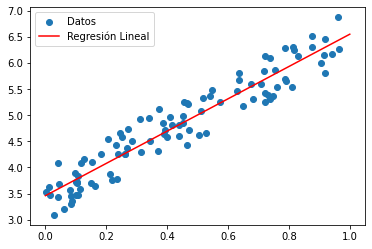

In [ ]:
#graficar
plt.scatter(x,y,label="Datos")
plt.plot(x_nuevo,y_nuevo,"r-",label="Regresión Lineal")
plt.legend()
plt.show()

In [ ]:
#Importar Ridge para hacer nuestra regresión de cresta
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x,y)

Ridge()

In [ ]:
#Calcula los parámetros de ridge
ridge.intercept_, ridge.coef_

(array([3.60798182]), array([[2.75451543]]))

In [ ]:
#Hacer la linea de la predicción de Ridge
x_cresta = np.linspace(0,1,100)
y_cresta = 3.66 + 2.72 * x_cresta

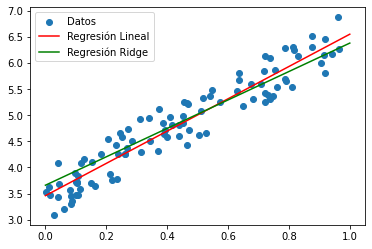

In [ ]:
#graficar comparando la regresión lineal y de Ridge
plt.scatter(x,y,label="Datos")
plt.plot(x_nuevo,y_nuevo,"r-",label="Regresión Lineal")
plt.plot(x_cresta,y_cresta,"g-",label="Regresión Ridge")
plt.legend()
plt.show()

***

### <span style="color:blue"> Regresión de Lasso</span>

**Función de costo de la regresión de regresión de Lasso**

$ MSE(b) + \alpha  \sum_{i=1}^{m} |b| $

In [ ]:
#Importar lasso
from sklearn.linear_model import Lasso
#Asignar una alpha de 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(x,y)

Lasso(alpha=0.1)

In [ ]:
#Calcular los parámetros de intersección y coeficientes de x
lasso.intercept_, lasso.coef_

(array([3.99651322]), array([1.86461245]))

In [ ]:
#Hacer la linea de la predicción de lasso
x_lasso = np.linspace(0,1,100)
y_lasso = 3.99 + 1.86 * x_lasso

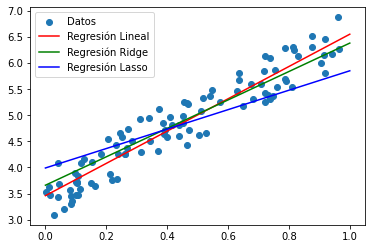

In [ ]:
#graficar comparando la regresión lineal, de Ridge y de Lasso
plt.scatter(x,y,label="Datos")
plt.plot(x_nuevo,y_nuevo,"r-",label="Regresión Lineal")
plt.plot(x_cresta,y_cresta,"g-",label="Regresión Ridge")
plt.plot(x_lasso,y_lasso,"b-",label="Regresión Lasso")
plt.legend()
plt.show()

***

### <span style="color:blue">Regresión de Red Elástica</span>

**Función de costo de la Regresión de Red Elástica**

$ MSE(b) + r\alpha  \sum_{i=1}^{m} |b| + \alpha \frac{1-r}{2} \sum_{i=1}^{m} b^2 $

In [ ]:
#Importar ElasticNet
from sklearn.linear_model import ElasticNet
net = ElasticNet(alpha=0.1, l1_ratio=0.5)
net.fit(x,y)

ElasticNet(alpha=0.1)

In [ ]:
#Calcular los parámetros de intersección y coeficientes de x
net.intercept_, net.coef_

(array([4.14013404]), array([1.53565938]))

In [ ]:
#Hacer la linea de la predicción de Red Elástica
x_net = np.linspace(0,1,100)
y_net = 4.14013 + 1.5356 * x_net

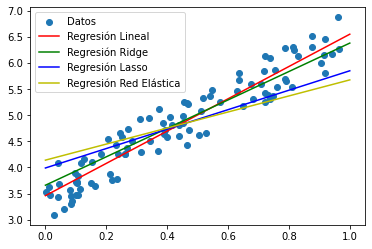

In [ ]:
#graficar comparando la regresión lineal, de Ridge, de Lasso y de Red Elástica
plt.scatter(x,y,label="Datos")
plt.plot(x_nuevo,y_nuevo,"r-",label="Regresión Lineal")
plt.plot(x_cresta,y_cresta,"g-",label="Regresión Ridge")
plt.plot(x_lasso,y_lasso,"b-",label="Regresión Lasso")
plt.plot(x_net,y_net,"y-",label="Regresión Red Elástica")
plt.legend()
plt.show()

***

## <span style="color:green">6. Regresión Logistica</span>

**Modelo de Regresión Logística**

$ \hat{p} = L(b^Tx) $

**Función logística**

$ L = \frac {1}{1+e^{-t}} $

**Función de Costo de la Regresión Logística**

$ J(b) = \frac{1}{m} \sum_{i=1}^{m}[ylog(\hat p)+(1-y)log(1-\hat p)] $

**Derivada de la función de Costo**

$ \frac{\partial}{\partial b} J(b) $

In [ ]:
#Traer el set de datos
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
#Visualizar el set de datos
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


**KEY:**
gmat: prueba de coeficiente intelectual
gpa: es tu promedio en la escuela

In [ ]:
#Dividir el set de datos en en las variables predichas y la variable a predecir
x = df[['work_experience','gpa']]
y = df['admitted']

In [ ]:
#importar LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x,y)

LogisticRegression()

In [ ]:
#Hacer las predicciones
y_pred = clf.predict(x)

In [ ]:
#Visualiza y_pred
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
#Utilizar la función predict_proba para visualizar la probabilidad de que sea admitido
y_proba = clf.predict_proba(x)

In [ ]:
#Generar una lista para ver la probabilidad de ser admitidos y a los que no
y_probano = [y_proba[i][1] for i in range(0,len(y_proba))]
y_probasi = [y_proba[i][0] for i in range(0,len(y_proba))]

In [ ]:
#Incluir estas listas en nuestro dataframe
df["predict"] = y_pred
df["probano"] = y_probano
df["probasi"] = y_probasi
df.head()

,gmat,gpa,work_experience,admitted,predict,probano,probasi
0,780,4.0,3,1,1,0.657716,0.342284
1,750,3.9,4,1,1,0.823506,0.176494
2,690,3.3,3,0,0,0.393787,0.606213
3,710,3.7,5,1,1,0.906574,0.093426
4,680,3.9,4,0,1,0.823506,0.176494


In [ ]:
#Visualizar el peso de la experiencia laboral, de gmat y de gpa
df.sort_values(by=["work_experience"])
df.sort_values(by=["gmat"])
df.sort_values(by=["gpa"])

,gmat,gpa,work_experience,admitted,predict,probano,probasi
38,590,1.7,4,0,0,0.133737,0.866263
9,690,1.7,1,0,0,0.006729,0.993271
21,600,2.0,1,0,0,0.010668,0.989332
19,590,2.3,3,0,0,0.121235,0.878765
22,550,2.3,4,0,0,0.281164,0.718836
6,690,2.3,1,0,0,0.016874,0.983126
27,580,2.3,2,0,0,0.046403,0.953597
35,650,2.3,1,0,0,0.016874,0.983126
10,610,2.7,3,0,0,0.204071,0.795929
31,620,2.7,2,0,0,0.082934,0.917066


In [ ]:
#Evaluar la regresión con métricas como la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y)

array([[19,  2],
       [ 2, 17]])

In [ ]:
#Evaluar la regresión con métricas como f1_score
from sklearn.metrics import f1_score
f1_score(y_pred, y)

0.8947368421052632

## <span style="color:green">6. Regresión Softmax</span>

$ claseA(x) = (b^A)^T x $

$ claseB(x) = (b^B)^T x $

$ claseC(x) = (b^C)^T x $

$\hat p_A = L(claseA(x)) $

$ \hat p_B = L(claseB(x))$

$ \hat p_C = L(claseC(x))$

$ L = \frac{e^x}{\sum_{i=1}^{m} e^x }  $

In [ ]:
#Importar LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class="multinomial")
clf.fit(x,y)
y_pred = clf.predict(x)